In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [5]:
df['children'] = df['children'].fillna(0)

In [6]:
df['country'] = df['country'].fillna("Unknown")

In [7]:
df.dropna(inplace=True)

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# Total guests = adults + children + babies
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Total stay nights
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Convert arrival month to numeric (reservation_status_date is already cleaned earlier)
df['arrival_month'] = pd.to_datetime(df['reservation_status_date']).dt.month
df['arrival_year'] = pd.to_datetime(df['reservation_status_date']).dt.year
df['arrival_day'] = pd.to_datetime(df['reservation_status_date']).dt.day

In [ ]:
EDA

In [12]:
df['is_canceled'].value_counts(normalize=True) * 100

is_canceled
0    92.165899
1     7.834101
Name: proportion, dtype: float64

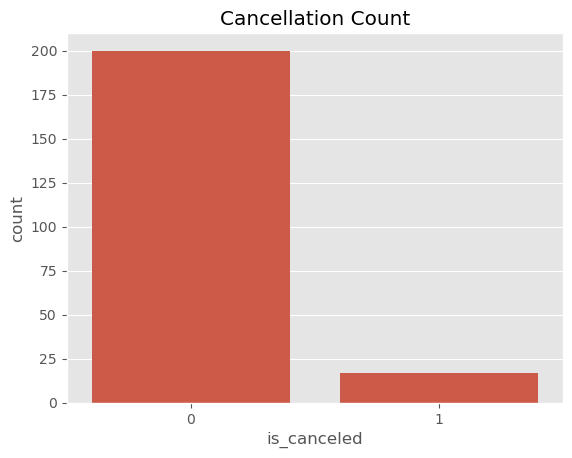

In [13]:
sns.countplot(data=df, x='is_canceled')
plt.title("Cancellation Count")
plt.show()

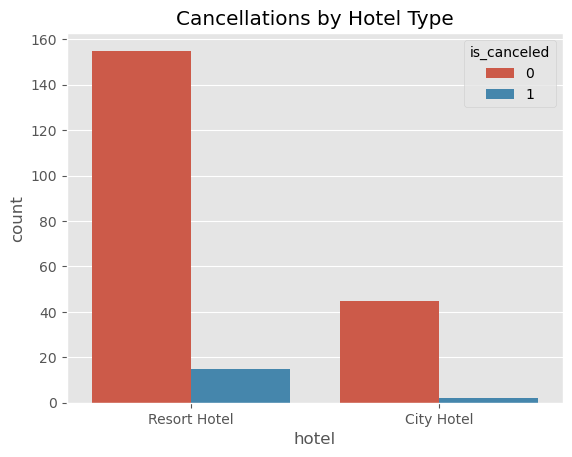

In [14]:
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title("Cancellations by Hotel Type")
plt.show()

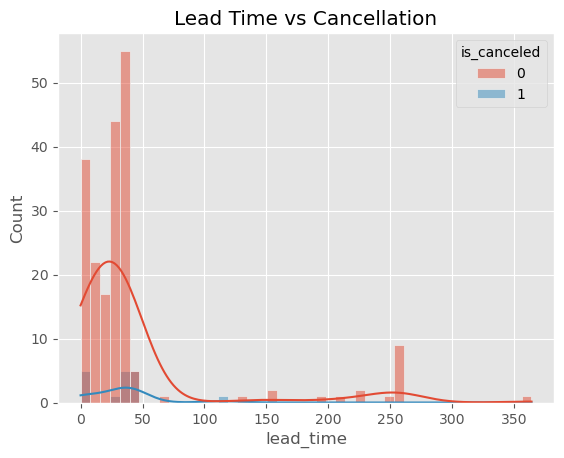

In [15]:
sns.histplot(data=df, x='lead_time', hue='is_canceled', kde=True)
plt.title("Lead Time vs Cancellation")
plt.show()

In [ ]:
Prepare data for Machine Learning

In [16]:
features = [
    'lead_time', 'total_stay', 'total_guests', 'arrival_month',
    'previous_cancellations', 'booking_changes', 'adr'
]

X = df[features]
y = df['is_canceled']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.00      0.00      0.00         3

    accuracy                           0.86        44
   macro avg       0.46      0.46      0.46        44
weighted avg       0.86      0.86      0.86        44

[[38  3]
 [ 3  0]]


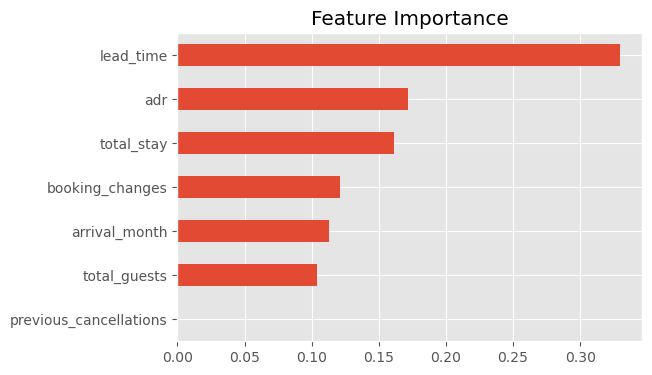

In [20]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(6,4))
plt.title("Feature Importance")
plt.show()

In [21]:
cancel_rate = df['is_canceled'].mean() * 100
cancel_rate

np.float64(7.834101382488479)

In [22]:
df.groupby('hotel')['is_canceled'].mean() * 100

hotel
City Hotel      4.255319
Resort Hotel    8.823529
Name: is_canceled, dtype: float64

In [23]:
df.groupby('hotel')['adr'].mean()

hotel
City Hotel      106.207447
Resort Hotel     52.067588
Name: adr, dtype: float64

In [24]:
df.groupby('arrival_month')['is_canceled'].mean() * 100

arrival_month
1      10.000000
2       0.000000
3       0.000000
4     100.000000
5      13.333333
6       0.000000
7       0.000000
8       8.333333
9       0.000000
10     18.750000
11      6.976744
12      0.000000
Name: is_canceled, dtype: float64

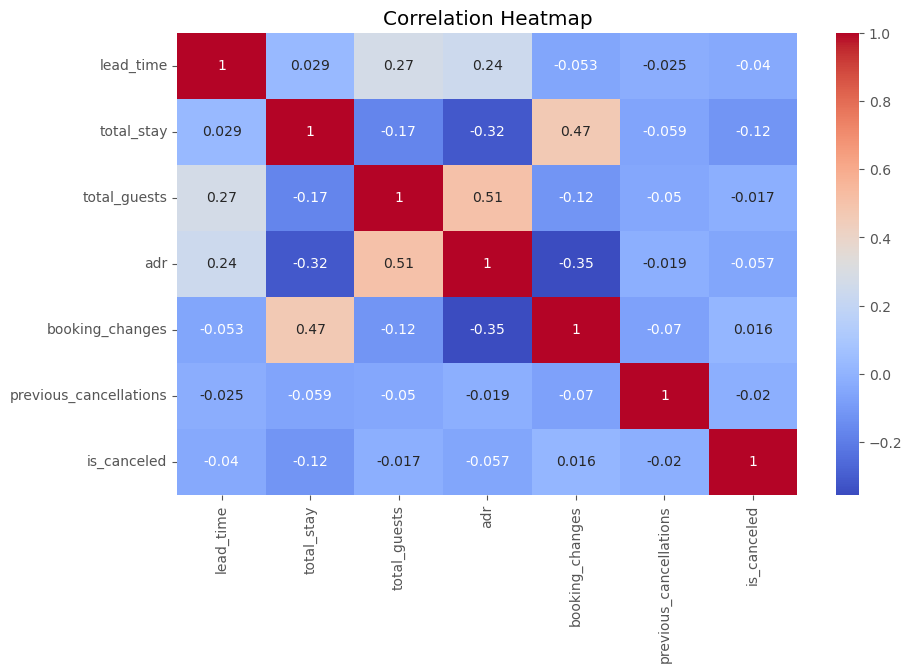

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['lead_time','total_stay','total_guests','adr','booking_changes','previous_cancellations','is_canceled']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
Data visualisation

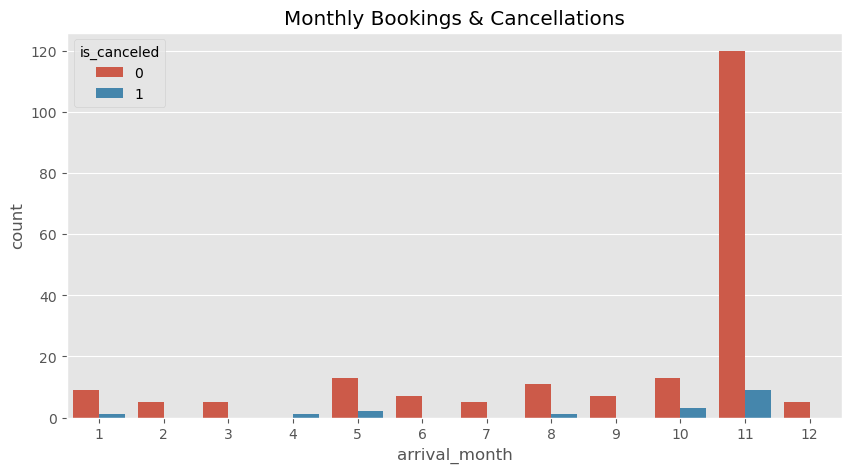

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='arrival_month', hue='is_canceled')
plt.title("Monthly Bookings & Cancellations")
plt.show()

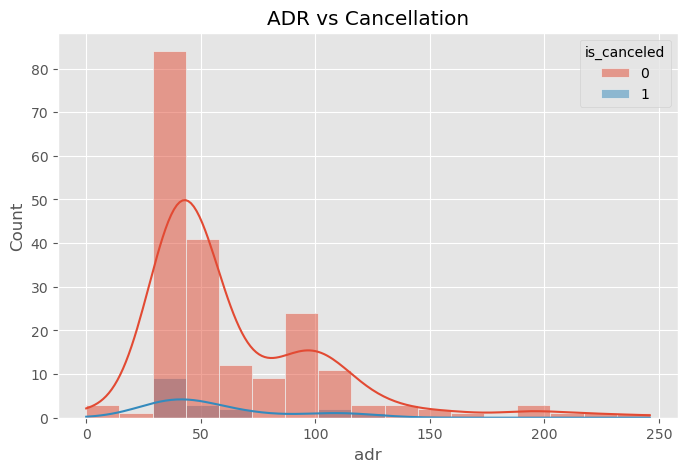

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='adr', hue='is_canceled', kde=True)
plt.title("ADR vs Cancellation")
plt.show()

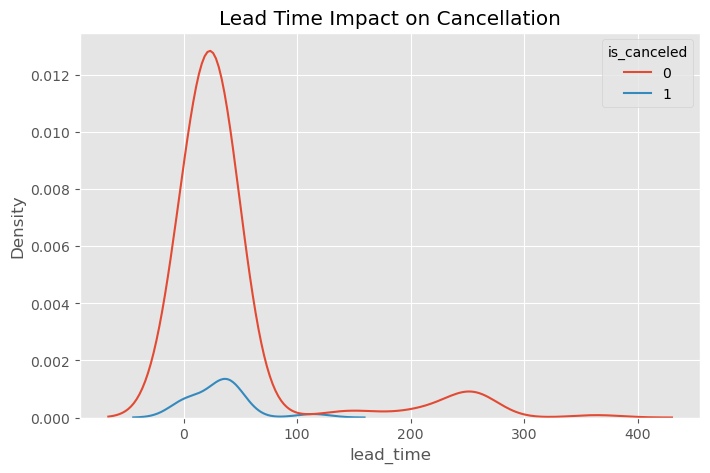

In [28]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='lead_time', hue='is_canceled')
plt.title("Lead Time Impact on Cancellation")
plt.show()

In [29]:
df.to_csv("cleaned_hotel_booking_data.csv", index=False)